# (WIP) Linear regression

## Overview
- recap from previous [notebook](https://github.com/insop/ML_crash_course/blob/main/1_ml_overview.ipynb)
- linear regression framework
- type: which predictor?
- loss function: how good is the predictor?
- optimization: how to compute the best predictor?
- sample example
***

## Recap

- ML as a way to predict target values or types by using training dataset.
- Classification task predicts categories and 
- regression tasks predicts real numbers.

- Supervised learning uses labeled dataset to train
- Unsupervised learning tryies to cluster
- a simple regression example

- `numpy` and `pandas`.
***

Previously, we have reviewed ML as a way to predict target values or types by using training dataset. Classification task predicts categories and regression tasks predicts real numbers.

For the type of training, supervised learning uses labeled dataset to train and unsupervised learning tryies to cluster or find implcit information from unlabeled dataset.
We havre reviewed a simple regression task that predicts life expectancy based on GDP per capita

For the tools, we have reviewed `numpy` and `pandas`.
***

Saving figure linear_regression_example_1
Saving figure linear_regression_example_2
Saving figure linear_regression_example_3
Saving figure linear_regression_example_4


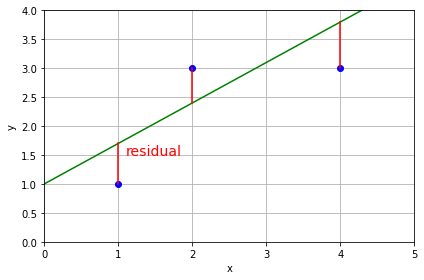

In [30]:
# TODO move to a separate file
# import libraries

import sklearn
import sys

import matplotlib.pyplot as plt # graph
import numpy as np # number handling
import pandas as pd # structured data handling
import sklearn.linear_model
import os

# enable this when running locally
from utils import save_fig

# linear regression sample data set and plot

# First plot
training_data = {
    'x':[1,2,4], 
    'y':[1,3,3]}

plt.axis([0, 5, 0, 4])
plt.plot(training_data['x'], training_data['y'],'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.text(2, 1.5, "x: {}".format(training_data['x']), fontsize=14, color="b")
plt.text(2, 1.0, "y: {}".format(training_data['y']), fontsize=14, color="b")
plt.text(2, 0.5, "When x = 3, what will be y?", fontsize=14, color="r")
plt.grid()

save_fig("linear_regression_example_1")
X = X=np.linspace(0, 5, 50)
plt.plot(X, 0.7*X+1, "g")
x_new = 3
plt.plot(x_new, 0.7*x_new+1, "ro")
save_fig("linear_regression_example_2")

# Clear Figure
plt.clf()
plt.axis([0, 5, 0, 4])
plt.plot(training_data['x'], training_data['y'],'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(X, 0.7*X+1, "g")
plt.plot(X, 0.3*X+2, "r")
# plt.plot(X, 0.3*X+2, "g")
plt.text(2, 1.5, "f(x) = 0.7x + 1", fontsize=14, color="g")
plt.text(2, 1.0, "f(x) = 0.3X + 2", fontsize=14, color="r")
plt.text(2, 0.5, r"Find $w_1$, $w_2$ in $f(x) = w_1X + w_2$", fontsize=14, color="b")
save_fig("linear_regression_example_3")
# plt.show()


# Clear Figure
plt.clf()
plt.axis([0, 5, 0, 4])
plt.plot(training_data['x'], training_data['y'],'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
w = [0.7, 1]
plt.plot(X, w[0]*X+w[1], "g")

for i in range(len(training_data)+1):
    plt.plot([training_data['x'][i], training_data['x'][i]],
             [training_data['y'][i], w[0]*training_data['x'][i]+w[1]], 'r-')
    
plt.text(1.1, 1.5, "residual", fontsize=14, color="r")
save_fig("linear_regression_example_4")


## Linear regression

- Whe we have these point pairs, can we predict $y$ for new $x$, such as 3?
- $x$ :[1,2,4], $y$:[1,3,3]

![linear_regression_example_1](figures/linear_regression_example_1.png)

## Linear regression
- if we can learn this linear line, then we can predict $y$ given new $x$

![linear_regression_example_2](figures/linear_regression_example_2.png)

## Linear regression

- predicts values based on input dataset
- $x$ (input) $\rightarrow$ $f$ (predictor) $\rightarrow$ $\hat{y}$ (output)
- How to design predictor?
    - what type of predictor to use
    - **loss function**: how to measure the goodness?
    - **optimization**: how to compute the predictor? 
***

## Linear regression

- hypothesis predictor class: $w \in \mathbb{R}^2$
- we want to find $f_w(x) = w_1 x + w_2$
- **weight vector**: $W= [w_1, w_2]$
- **feature vector**: $\phi(x) = [x, 1]$
- $f_w(x) = W \cdot \phi(x)$ = $w_1 x + w_2 1$
![linear_regression_example_3](figures/linear_regression_example_3.png)
***

## Loss function: how good is a predictor?

- $Loss(x, y, W)$ = $(f_w(x) - y)^2$, **squared loss**, ($f_w(x) = w_1 x + w_2$)
- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} Loss(x, y, W)$
- Example with $W = [0.7,1]$
    - Loss($1,1,W$) = $(0.7\times1 + 1 - 1)^2$
    - Loss($2,3,W$) = $(0.7\times2 + 3 - 3)^2$
    - Loss($4,3,W$) = $(0.7\times4 + 3 - 3)^2$
    - Train_loss($W$) = $\frac{1}{3}$(Loss($1,1,W$) + Loss($2,3,W$) + Loss($4,3,W$))
    - See the example code below

![linear_regression_example_4](figures/linear_regression_example_4.png)
***

In [30]:
# Loss calculation example

import numpy as np

training_data = {
    'x':[1,2,4], 
    'y':[1,3,3]}

# [0.7, 1]: gree
# [0.3, 2]: red
# [0.57, 1]: other
Ws = [[0.7, 1], [0.3, 2], [-1,-1]]

def phi(x):
    """Get feature of x"""
    return np.array([x, 1])

def dot(X, Y):
    """ Do the dot product """
    return sum([x*y for x, y in zip(X, Y)])

for w in Ws:
    """Evaluate w's loss"""
    print()
    losses = []
    for i,(x,y) in enumerate(zip(training_data['x'], training_data['y'])):
        phi_x = phi(x)

        loss = (dot(w, phi_x) - y)**2
        losses.append(loss)

#         print("loss_{}: {}".format(i, loss))
    print("Total loss for {}: {}".format(w, sum(losses)/len(losses)))
    


Total loss for [0.7, 1]: 0.4966666666666666

Total loss for [0.3, 2]: 0.6299999999999998

Total loss for [-1, -1]: 36.333333333333336


## Visualizing loss function

- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} Loss(x, y, W)$

![loss_visualization](figures/loss_visualization.png)
Figure is from Ref[2]
***

## Optimization: how to find the best $W$?
- **Goal**: find *minimum* Train_loss($W$)
    - min$_w$ Train_loss($W$)
- **gradient**: the gradient $\nabla_w$ Train_loss($W$) is the direction that *increases* the training loss the most
- **Gradient descent** algorithm
    - initialize $w$ = [0, ... 0]
    - set $\eta$, step size (learning rate)
    - For t = 1, ..., T: # called epochs
        - $w \leftarrow w - \eta$ $\nabla$ Train_loss($W$) 
***

## Computing the gradient

- Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} (W \cdot \phi(x) - y)^2$

- Gradient
    - $\nabla_w$ Train_loss($W$) = $\frac{1}{|D_{train}|}\sum_{{(x,y)}\in D_{train}} 2(W \cdot \phi(x) - y)\phi(x)$
***

We are doing gradient with respect $W$, so other terms can be considered as constant, then we can apply chain rules.

In [46]:
# Gradient descent example

import numpy as np

training_data = {
    'x':[1,2,4], 
    'y':[1,3,3]}

def phi(x):
    """Get feature of x"""
    return np.array([x, 1])

def dot(X, Y):
    """ Do the dot product """
    return sum([x*y for x, y in zip(X, Y)])

eta = 0.1
w = np.array([0, 0])

for t in range(500):
    gradients = []
    for i, (x,y) in enumerate(zip(training_data['x'], training_data['y'])):
        phi_x = phi(x)
        gradient = (2*(dot(w, phi_x)-y)*phi_x)
        gradients.append(gradient)
    w = w - eta* sum(gradients)/len(gradients)
    print(sum(gradients)/len(gradients), w)

print()
print("Final weight: {}".format(w))

    

[-12.66666667  -4.66666667] [1.26666667 0.46666667]
[7.24444444 2.17777778] [0.54222222 0.24888889]
[-3.91407407 -1.63851852] [0.93362963 0.41274074]
[2.3302716  0.51575309] [0.70060247 0.36116543]
[-1.17279342 -0.67485761] [0.81788181 0.42865119]
[0.78405092 0.0074175 ] [0.73947672 0.42790944]
[-0.31708187 -0.35995643] [0.77118491 0.46390509]
[ 0.29481241 -0.1399936 ] [0.74170366 0.47790445]
[-0.05259462 -0.24957401] [0.74696313 0.50286185]
[ 0.13750572 -0.17511505] [0.73321255 0.52037335]
[ 0.02671807 -0.20426138] [0.73054075 0.54079949]
[ 0.08463475 -0.17587753] [0.72207727 0.55838724]
[ 0.04822228 -0.18019824] [0.71725504 0.57640707]
[ 0.0648036  -0.16666233] [0.71077468 0.5930733 ]
[ 0.05185431 -0.16357154] [0.70558925 0.60943045]
[ 0.05559166 -0.15505591] [0.70003009 0.62493604]
[ 0.05012276 -0.1499875 ] [0.69501781 0.6399348 ]
[ 0.04994506 -0.14338063] [0.6900233  0.65427286]
[ 0.04693293 -0.1380122 ] [0.68533001 0.66807408]
[ 0.04563252 -0.13231179] [0.68076676 0.68130526]
[ 0.

## (?) Features and vectors

## Summary
- review linear regression
- how to form linear regression
- loss function, how to measure goodness of the hypothesis
- optimization, how to find the best parameters (weights)

## Credits

This notebook uses the contents from the followring materials:

1. [cs221 ML linear regression](https://stanford-cs221.github.io/autumn2021-extra/modules/machine-learning/linear-regression.pdf)


## Further readings

1. Chapter 1 from Book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
1. [cs221 ML linear regression](https://stanford-cs221.github.io/autumn2021-extra/modules/machine-learning/linear-regression.pdf)
1. [Jovian's Linear Regression with Scikit Learn](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn)